In [1]:
#All the imports
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
salaries = pd.read_csv("salaries_final.csv", index_col=0)
#salaries.head()

In [3]:
target = salaries['Target']
target.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Target, dtype: object

In [4]:
salaries = salaries.drop('Target', axis=1)
salaries.dtypes

Age              int64
Education       object
Occupation      object
Relationship    object
Race            object
Sex             object
dtype: object

In [5]:
dummy_salaries = pd.get_dummies(salaries)
dummy_salaries.head()

,Age,Education_10th,Education_11th,Education_12th,Education_1st-4th,Education_5th-6th,Education_7th-8th,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [6]:
y = target
X = dummy_salaries

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 123)

In [9]:
regular_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
regular_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
regular_tree.feature_importances_

array([0.06761352, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08071446, 0.        , 0.006495  , 0.02596604, 0.        ,
       0.01482269, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0853097 , 0.00311049, 0.        , 0.        ,
       0.        , 0.        , 0.0879446 , 0.        , 0.        ,
       0.        , 0.        , 0.4950878 , 0.        , 0.        ,
       0.        , 0.        , 0.1329357 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

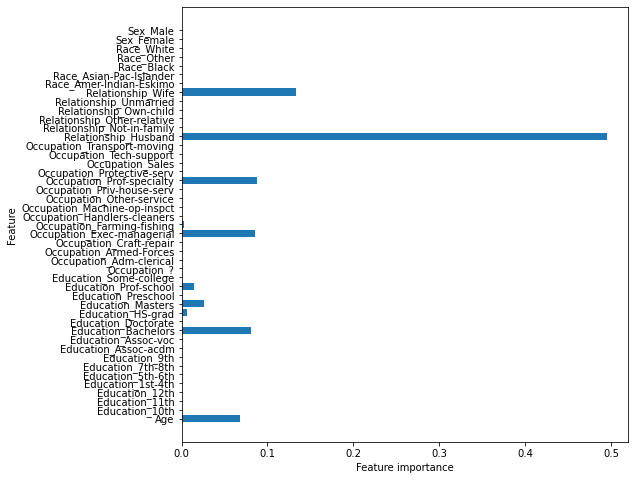

In [12]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(regular_tree)

In [13]:
pred = regular_tree.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8204151824100233


In [17]:
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[5762  403]
 [1059  917]]


In [20]:
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.89      6165
        >50K       0.69      0.46      0.56      1976

    accuracy                           0.82      8141
   macro avg       0.77      0.70      0.72      8141
weighted avg       0.81      0.82      0.81      8141



In [21]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(
    criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [23]:
bagged_tree.score(X_test, y_test)

0.8221348728657413

In [26]:
forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [27]:
forest.score(X_train, y_train)

0.8054873054873055

In [28]:
forest.score(X_test, y_test)

0.8049379683085616

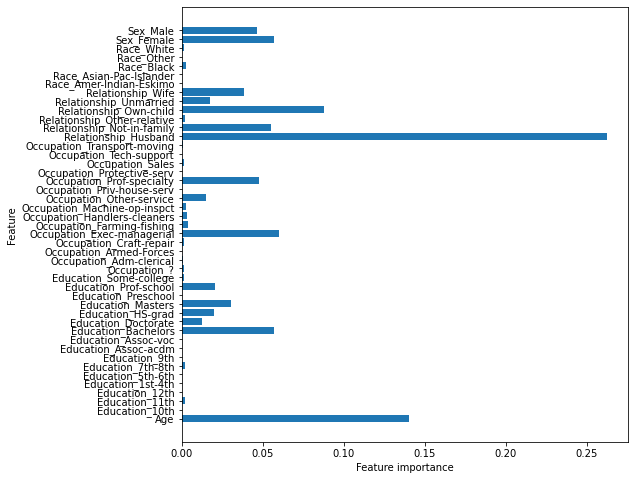

In [30]:
plot_feature_importances(forest)

In [31]:
forest2 = RandomForestClassifier(n_estimators=5, max_depth=2, max_features=10)
forest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [34]:
rf_tree1 = forest2.estimators_[0]

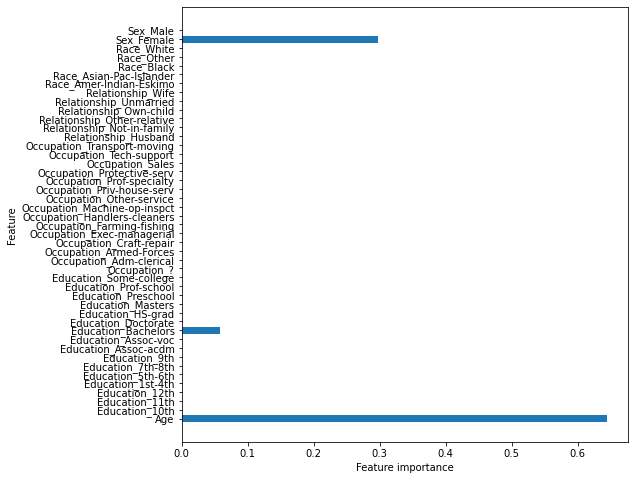

In [35]:
plot_feature_importances(rf_tree1)

In [36]:
rf_tree2 = forest2.estimators_[1]

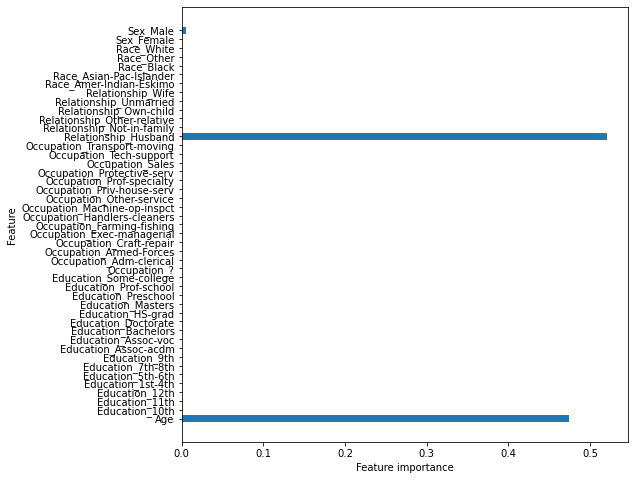

In [37]:
plot_feature_importances(rf_tree2)